In [1]:
import torch
from torch.autograd import Variable

In [2]:
dtype = torch.FloatTensor

batch_size, input_size, hidden_size, output_size = 64, 1000, 100, 10

# x = torch.randn(batch_size, input_size).type(dtype)
# y = torch.randn(batch_size, output_size).type(dtype)
x = Variable(torch.randn(batch_size, input_size).type(dtype), requires_grad=False)
y = Variable(torch.randn(batch_size, output_size).type(dtype), requires_grad=False)

# w1 = torch.randn(input_size, hidden_size).type(dtype)
# w2 = torch.randn(hidden_size, output_size).type(dtype)
w1 = Variable(torch.randn(input_size, hidden_size).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(hidden_size, output_size).type(dtype), requires_grad=True)

learning_rate = 1e-6

In [3]:
print(type(x), type(y), type(w1), type(w2))

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>


In [4]:
print(x.shape, y.shape, w1.shape, w2.shape)

torch.Size([64, 1000]) torch.Size([64, 10]) torch.Size([1000, 100]) torch.Size([100, 10])


In [5]:
all_losses = []

for i in range(500):
    # forward
    inh1 = x.mm(w1)
    outh1 = inh1.clamp(min=0) # relu activation function
    prediction = outh1.mm(w2)
    
    # loss
    loss = (prediction - y).pow(2).sum()
#     print('i = %d, loss = %d' %(i, loss))
    all_losses.append(loss)

    # backward (WE NEED 'grad_loss_w1', 'grad_loss_w2' for weight update)
    loss.backward()
    
    # weight update
#     w1 -= learning_rate * grad_loss_w1
#     w2 -= learning_rate * grad_loss_w2
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data
    
    # make your gradient 0
    # set the gradients to zero before starting to do backpropragation 
    w1.grad.data.zero_()
    w2.grad.data.zero_()

In [6]:
w1.data

tensor([[-0.4468,  1.0372, -0.1659,  ...,  0.6734,  1.2917, -0.7115],
        [ 1.4570,  1.2794, -1.2778,  ..., -0.0272, -0.9343, -0.4103],
        [-2.2319, -1.5829, -1.2942,  ...,  1.2886, -0.1501,  0.6962],
        ...,
        [ 0.8160, -0.0384, -0.5877,  ...,  0.6180, -0.4175, -1.8179],
        [ 1.5093,  0.6622,  0.8125,  ..., -0.4763, -0.1964, -0.9560],
        [ 0.5268,  0.9735,  0.2587,  ...,  0.5277,  0.1080, -0.1838]])

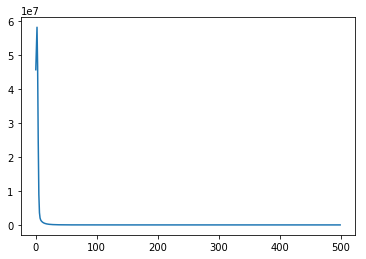

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure()
plt.plot(all_losses)